# 1.0 Working on Signature Methods

In [1]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)
df = {}

import clustergrammer_groupby as cby
import gene_exp_10x

In [2]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline 

### Load Default Dataset

In [3]:
net.load_file('../data/rc_two_cats.txt')
df['ini'] = net.export_df()
df['ini'].shape

### Drop Gender Category
cols = df['ini'].columns.tolist()
new_cols = []
for inst_col in cols:
    inst_col = list(inst_col)
    new_col = tuple(inst_col[:2])
    new_cols.append(new_col)

df['ini'].columns = new_cols

### Make Dataset with no categories

In [4]:
df['no_cat'] = deepcopy(df['ini'])
cols = df['no_cat'].columns.tolist()
new_cols = []
for inst_col in cols:
    new_col = inst_col[0]
    new_cols.append(new_col)
df['no_cat'].columns = new_cols

In [5]:
net.set_cat_color(axis='col', cat_index=1, cat_name='Category: one', inst_color='red')
net.set_cat_color(axis='col', cat_index=1, cat_name='Category: two', inst_color='blue')
net.set_cat_color(axis='col', cat_index=1, cat_name='Category: three', inst_color='yellow')
net.set_cat_color(axis='col', cat_index=1, cat_name='Category: four', inst_color='black')
net.set_cat_color(axis='col', cat_index=1, cat_name='Category: five', inst_color='purple')

# Visualize Original Dataset

In [6]:
net.load_df(df['ini'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [7]:
max_cl = df['ini'].idxmax(axis=1)

In [8]:
max_cl

(Gene: CDK4, Gene Type: Interesting)             (Cell Line: HCC827, Category: one)
(Gene: LMTK3, Gene Type: Not Interesting)       (Cell Line: CAL-12T, Category: two)
(Gene: LRRK2, Gene Type: Not Interesting)       (Cell Line: H1944, Category: three)
(Gene: UHMK1, Gene Type: Not Interesting)       (Cell Line: H1944, Category: three)
(Gene: EGFR, Gene Type: Interesting)             (Cell Line: HCC827, Category: one)
(Gene: STK32A, Gene Type: Interesting)           (Cell Line: HCC78, Category: five)
(Gene: NRK, Gene Type: Interesting)              (Cell Line: HCC827, Category: one)
(Gene: ERBB2, Gene Type: Not Interesting)       (Cell Line: CALU-3, Category: four)
(Gene: ERBB4, Gene Type: Not Interesting)         (Cell Line: H661, Category: five)
(Gene: AAK1, Gene Type: Not Interesting)          (Cell Line: H1650, Category: two)
(Gene: SRPK3, Gene Type: Not Interesting)        (Cell Line: H2106, Category: four)
(Gene: STK39, Gene Type: Interesting)           (Cell Line: CALU-3, Category

# Run with True Categories

In [9]:
# from sklearn.metrics import pairwise_distances
# def predict_cats_from_sigs(df_data_ini, df_sig, dist_type='cosine', predict_level='Predict Category',
#                            truth_level=1):
#     ''' Predict category using signature '''

#     keep_rows = df_sig.index.tolist()
#     df_data = deepcopy(df_data_ini.ix[keep_rows])

#     # calculate sim_mat of df_data and df_sig
#     cell_types = df_sig.columns.tolist()
#     barcodes = df_data.columns.tolist()
#     sim_mat = 1 - pairwise_distances(df_sig.transpose(), df_data.transpose(), metric=dist_type)
#     df_sim = pd.DataFrame(data=sim_mat, index=cell_types, columns=barcodes).transpose()

#     # get the top column value (most similar signature)
#     df_sim_top = df_sim.idxmax(axis=1)
    
#     # add predicted category name to top list
#     top_list = df_sim_top.get_values()
#     top_list = [ predict_level + ': ' + x[0] for x in top_list]    

#     # add cell type category to input data
#     df_cat = deepcopy(df_data)
#     cols = df_cat.columns.tolist()
#     new_cols = []
    
#     # check whether the columns have the true category available
#     has_truth = False
#     if type(cols[0]) is tuple:
#         has_truth = True
    
    
#     if has_truth:
#         new_cols = [tuple(list(a) + [b]) for a,b in zip(cols, top_list)]
#     else:
#         new_cols = [tuple([a] + [b]) for a,b in zip(cols, top_list)]
    
#     # transfer new categories
#     df_cat.columns = new_cols
    
#     # keep track of true and predicted labels
#     y_info = {}
#     y_info['true'] = []
#     y_info['pred'] = []
    
#     if has_truth:
#         y_info['true'] = [x[truth_level].split(': ')[1] for x in cols]
#         y_info['pred'] = [x.split(': ')[1] for x in top_list]



#     return df_cat, df_sim.transpose(), df_sim.transpose(), y_info

In [10]:
df['cat_sig'], keep_genes, keep_genes_dict = cby.generate_signatures(df['ini'], 'Category', pval_cutoff=0.05)
df['pred_cat'], df['sig_sim'], y_info = cby.predict_cats_from_sigs(df['ini'], df['cat_sig'])
df['conf'], populations, ser_correct, fraction_correct = cby.confusion_matrix_and_correct_series(y_info)
print(fraction_correct)

0.827586206897


# Run with no True categories

In [11]:
# df['cat_sig'], keep_genes, keep_genes_dict = cby.generate_signatures(df['ini'], 'Category')
# df['pred_cat'], df['sig_sim'], df['sig_max'], y_info = cby.predict_cats_from_sigs(df['no_cat'], df['cat_sig'])

# Category Signature

In [12]:
net.load_df(df['cat_sig'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


### Visualize Informative Dimensions in Original Data
Generate a matrix with only category-informative dimensions/genes.

In [13]:
net.load_df(df['ini'].ix[keep_genes])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Predict Category Based on Signature

In [14]:
net.load_df(df['pred_cat'])
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Category: one', inst_color='red')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Category: two', inst_color='blue')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Category: three', inst_color='yellow')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Category: four', inst_color='black')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Category: five', inst_color='purple')

In [15]:
net.load_df(df['pred_cat'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [16]:
net.load_df(df['sig_sim'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [17]:
# net.load_df(df['sig_max'])
# net.cluster()
# net.widget()

### F1 Scores

In [18]:
print(f1_score(y_info['true'], y_info['pred'], average='macro'))
print(f1_score(y_info['true'], y_info['pred'], average='micro'))
print(f1_score(y_info['true'], y_info['pred'], average='weighted'))

0.825734265734
0.827586206897
0.820352061731


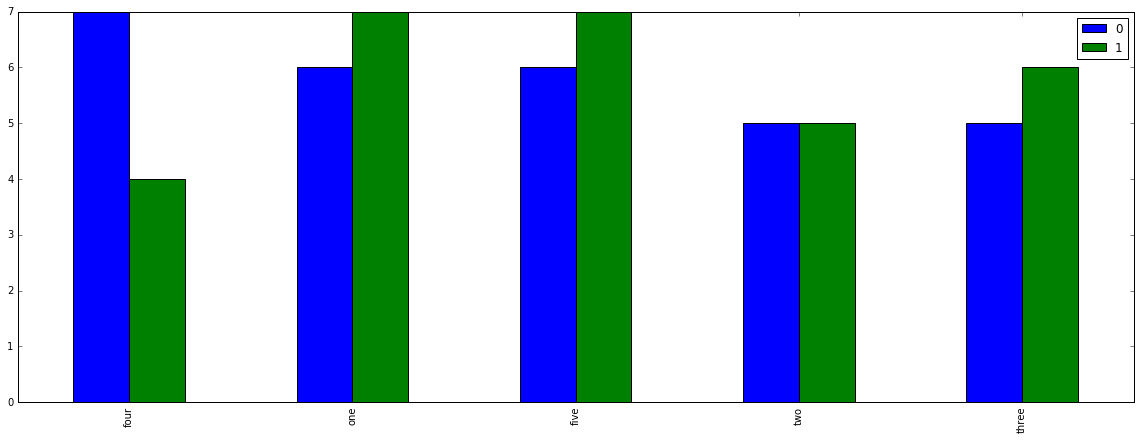

In [19]:
ser_orig_pop = pd.Series(populations['true']).sort_values(ascending=False)
ser_pred_pop = pd.Series(populations['pred']).sort_values(ascending=False)
df['compare_pop'] = pd.concat([ser_orig_pop, ser_pred_pop], axis=1)
df['compare_pop'] = df['compare_pop'].loc[ser_orig_pop.index.tolist()]
df['compare_pop'].plot(kind='bar', figsize=(20,7))

### Visualize confusion matrix

In [20]:
net.load_df(df['conf'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [21]:
real_fraction_correct = deepcopy(fraction_correct)

### Calculate the fraction of correct predictions for each category type

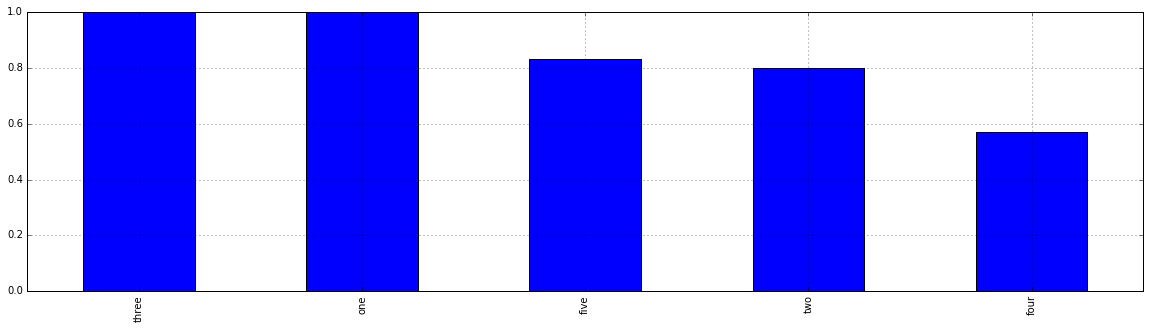

In [22]:
ser_correct.sort_values(ascending=False).plot(kind='bar', figsize=(20,5), grid=True)

# Shuffle Labels and Predict Categories
Run 

In [23]:
num_shuffles = 100
perform_ser = cby.compare_performance_to_shuffled_labels(df['ini'], df['cat_sig'], 'Category', 
                                                         num_shuffles=num_shuffles)
print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())
print('previously calc real performance: ', real_fraction_correct)

performance (fraction correct) of unshuffled: 0.827586206897
mean:  0.6462068965517241 std:  0.09649448470008613
previously calc real performance:  0.827586206897


In [24]:
real_performance = perform_ser[perform_ser > real_fraction_correct].shape[0]/num_shuffles
print('real labels perform in the top ' + str(real_performance*100) + '% of shuffled labels')

real labels perform in the top 3.0% of shuffled labels


### Example Shuffled Dataset

In [25]:
# net.load_df(df['shuffle'])
# net.cluster()
# net.widget()